In [71]:
#Загружаем библиотеки

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Для начала загрузим и посмотрим на наши данные

In [4]:
path_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/6/ads_data.csv'
path_cl = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-m.kalachinova-16/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv'

In [5]:
ads_data = pd.read_csv(path_data)

In [6]:
ads_clients = pd.read_csv(path_cl)

In [7]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [8]:
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [9]:
# Посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. 
# (некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами)

In [10]:
# Сгруппируем данные по id события и названию события, посчитаем их количество и сохраним в переменную 'events_number'

events_number = ads_data.groupby(['ad_id', 'event'], as_index=False) \
                        .agg({'time': 'count'}) \
                        .rename(columns={'time': 'event_number'})

In [11]:
events_number.head()

,ad_id,event,event_number
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [12]:
# Построим сводную таблицу, для того чтобы получить все пустые строки с кликами. 


pivot_events_number = events_number.pivot(index='ad_id',
                                          columns='event',
                                          values='event_number') \
                                   .fillna(0) #Заменим их на нули.

In [13]:
pivot_events_number.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [14]:
# Округлим полученные средние по событиям до целых чисел

pivot_events_number.mean().round()

event
click    113.0
view     923.0
dtype: float64

In [15]:
# Для решения следующей задачи, отфильтруем наш датасет по показам (view)

views_per_ad = events_number.query('event =="view"' )
views_per_ad.head()

,ad_id,event,event_number
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58


In [16]:
views_per_ad.describe()

,ad_id,event_number
count,956.000000,956.000000
mean,57756.006276,931.822176
std,38701.096189,13006.492754
min,2.000000,10.000000
25%,29747.750000,36.000000
50%,43146.500000,84.000000
75%,107173.000000,209.250000
max,122078.000000,351802.000000


In [17]:
# Прологорифмируем колонку 'event_number', чтобы построить более читаемый график

views_per_ad['log_views'] = np.log(views_per_ad.event_number)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Зададим параметры к нашему будущему графику

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

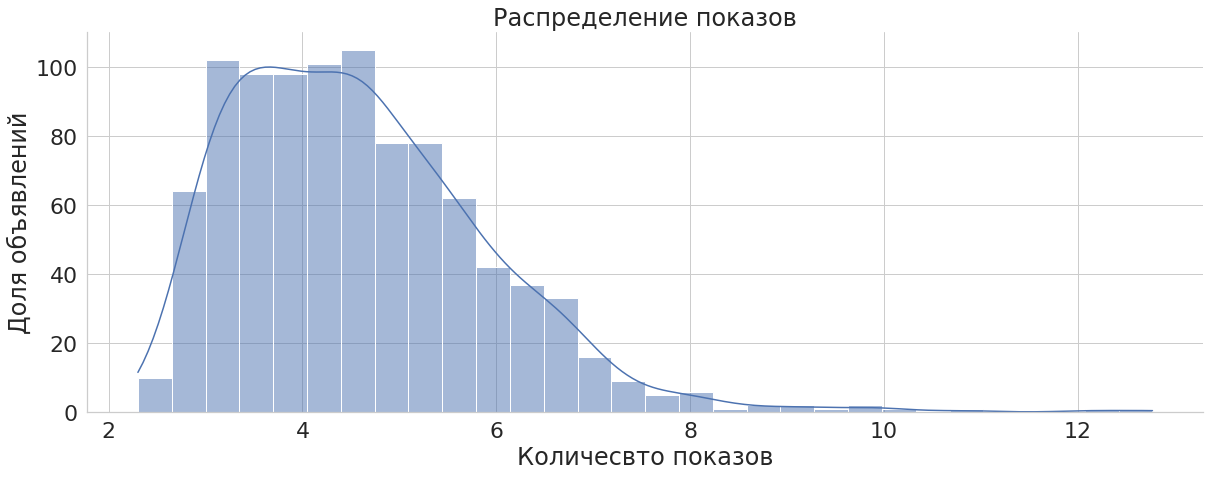

In [19]:
# Визуализируем данные с помощью хистплота

ax = sns.histplot(views_per_ad.log_views, kde=True)
ax.set(xlabel='Количесвто показов', ylabel='Доля объявлений')
plt.title('Распределение показов')
sns.despine()

In [20]:
# Теперь, нам нужно посчитать скользящее среднее показов с окном 2. 
# И ответить на вопрос: какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [21]:
# Для начала найдем все средние значения по каждой дате

In [22]:
# Для этого построим сводную таблицу с колиеством показов каждого объявления по датам 

pivot_views = ads_data.query('event == "view"') \
                      .pivot_table(index='ad_id',
                                   columns='date',
                                   values='time',
                                   aggfunc='count')

In [23]:
pivot_views.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [24]:
mean_views = pivot_views.mean()

In [25]:
mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [26]:
rolling_views = pivot_views.mean().rolling(2).mean()

In [27]:
# Наконец, получим значение скользящего среднего за 6 апреля 2019 года (ответ необходимо округлить до целых):

rolling_views['2019-04-06'].round()

598.0

In [28]:
# Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. 
# В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
# Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

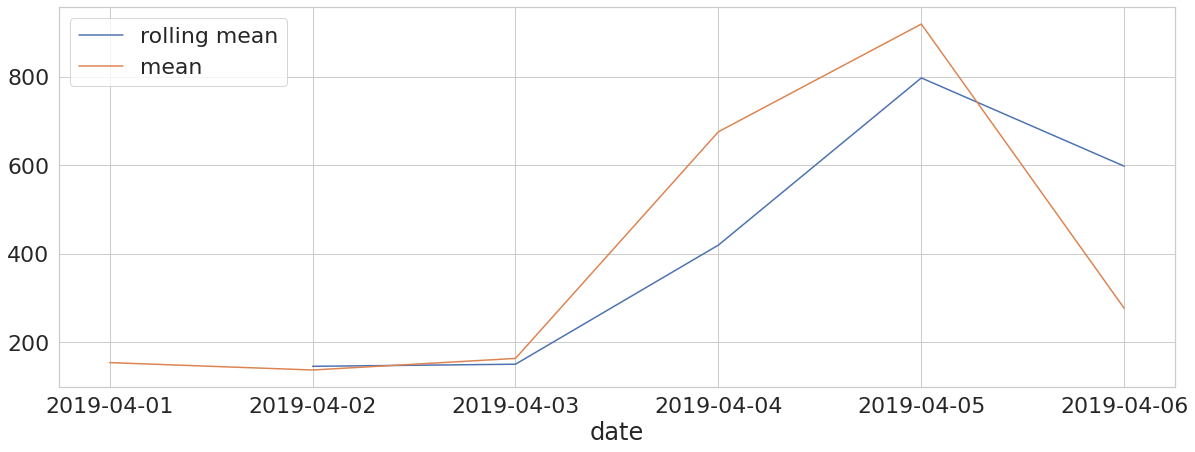

In [29]:
# Сделаем график с помощью лайнплота с двумя значениями (среднее по дням и скользящее среднее количества показов)

sns.lineplot(data=rolling_views, label = 'rolling mean')
sns.lineplot(data=mean_views, label= 'mean')

In [30]:
# Нам небходимо узнать, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним?

anomaly_date = mean_views.subtract(rolling_views) \
                          .abs() \
                          .idxmax()
anomaly_date

# Ответ: 2019-04-06

'2019-04-06'

In [31]:
# 5*. Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, 
# в который была замечена самая большая по модулю аномалия.

In [32]:
# Для поиска знака

diff_value = mean_views.subtract(rolling_views)[anomaly_date] 

if diff_value <= 0:
    anomaly_ad = pivot_views[anomaly_date].idxmax()
else:
    anomaly_ad = pivot_views[anomaly_date].idxmin()
print(anomaly_ad)

112583


In [33]:
def find_anomaly_ad(view_by_day_per_add):

    
    # Ищем среднее для каждой даты
    mean_views = view_by_day_per_add.mean()
    # Сохраняем в переменную разницу средних
    mean_difference = mean_views.subtract(rolling_views)
    # Находим аномальный день
    anomaly_date = mean_difference.abs() \
                                  .idxmax()
    # Находим знак
    diff_value = mean_difference[anomaly_date] 
    
    # Находим объявление с максимальным количеством показов
    if diff_value <= 0:
        anomaly_ad = view_by_day_per_add[anomaly_date].idxmax()
        
    # Находим объявление с минимальным количеством показов
    else:
        anomaly_ad = view_by_day_per_add[anomaly_date].idxmin()
        
    return anomaly_ad

In [34]:
# Работает)

find_anomaly_ad(pivot_views)

112583

In [35]:
# 6. Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента
# и первым запуском рекламного объявления этим клиентом. В качестве ответа укажите среднее число дней.

In [36]:
# Объединим наши исходные датафреймы и дропнем ненужные колонки

joint_df = ads_data.merge(ads_clients.drop(columns=['date', 'community_id']))
joint_df.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [37]:
# Преобразуем данные с датами в формат datetime

joint_df[['date', 'create_date']] = joint_df[['date', 'create_date']].apply(pd.to_datetime)

In [38]:
joint_df.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
create_date              datetime64[ns]
dtype: object

In [39]:
# Находим разницу между датами
def find_min_diff(group):
    diff = group.date - group.create_date
    return diff.min()

In [40]:
# Теперь среднее всех разниц

joint_df.groupby('client_union_id') \
    .apply(find_min_diff) \
    .mean()

# Ответ: 124

Timedelta('124 days 09:04:43.532219570')

In [41]:
# 7. Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. 
# Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

In [43]:
joint_df.groupby('client_union_id') \
    .apply(find_min_diff)

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [45]:
# Отоберем данные за нужный промежуток

threshold = pd.to_timedelta(365, unit='d')
threshold

Timedelta('365 days 00:00:00')

In [46]:
# Сохраним разницы дат в переменную 'creation_diff'

creation_diff = joint_df.groupby('client_union_id') \
                        .apply(find_min_diff)

In [48]:
# Нам нужны только те объявления, где от создания рекламного клиента до запуска первой рекламы не прошел год:

creation_diff < threshold

client_union_id
1         True
9         True
13        True
16        True
20        True
          ... 
122004    True
122013    True
122023    True
122031    True
122078    True
Length: 838, dtype: bool

In [59]:
# Перезапишем переменную
creation_diff = creation_diff.loc[creation_diff < threshold]
creation_diff.head()

client_union_id
1     98 days
9    114 days
13    66 days
16   105 days
20    32 days
dtype: timedelta64[ns]

In [53]:
# Теперь сравним со всеми клиентами их исходной таблицы 
ads_clients.client_union_id.nunique()

122078

In [57]:
# И посчитаем конверсию. По условию округлим до 2 знаков после запятой

round(creation_diff.shape[0] / ads_clients.client_union_id.nunique() * 100, 2)

# Ответ: 0,69 %

0.69

In [ ]:
# 8. Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. 
# Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего 
# существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [70]:
creation_diff

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [69]:
pd.cut(creation_diff,
       bins=pd.to_timedelta([0, 30, 90, 180, 365], unit='d'),
       labels=['0-30', '30-90', '90-180', '180-365']) \
       .value_counts()

# Ответ [0-30] = 11 пользователей

90-180     396
30-90      263
180-365    168
0-30        11
dtype: int64

In [75]:
# А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [79]:
creat_dif_groups = pd.cut(creation_diff,
                   bins=pd.to_timedelta([0, 30, 90, 180, 365], unit='d'),
                   labels=['0-30', '30-90', '90-180', '180-365'])

In [80]:
px.bar(creat_dif_groups.value_counts())